In [1]:
import pandas as pd
import json
import seaborn as sns
import pandas as pd
import json
import matplotlib.pyplot as plt

# All timing are in micro seconds (us) 

In [2]:
df = pd.read_csv("./results/oob/mm_oob_fr.csv")
df_avg = pd.read_csv("./results/oob/mm_oob_avg.csv")
pd.options.display.max_rows = 999
confs = list(df['conf'].values)
unq_m = df['m'].unique()
n_confs = int(df.shape[0] / len(unq_m))
df

,conf,m,grid_size,in0_storage_type,in1_storage_type,out_storage_type,dtype,math_fidelity,conversion_in0,conversion_in1,transfer_in0,transfer_in1,tilization_in0,tilization_in1,first_run,second_run,compile_time
0,f16_m2,256,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,864.911079,315.552950,467.863083,220.296383,313937.596083,300.719738,614709.889889,383.968353,614325.921535
1,f16_m2,512,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,7999.850512,325.554609,1261.545420,378.574133,299146.206379,302.069187,617103.030682,377.490520,616725.540161
2,f16_m2,1024,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,5387.188196,325.671434,1948.537827,989.125967,293075.178862,380.997658,617366.255522,531.836748,616834.418774
3,f16_m2,2048,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,665.869713,319.411755,3725.061417,3474.720716,295085.936785,713.591576,631237.223148,1234.710217,630002.512932
4,f16_m2,3072,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,680.204630,324.748755,7836.548090,7629.070282,289667.451382,1435.467005,622559.059858,2562.423944,619996.635914
5,f16_m2,4096,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,726.066828,338.922739,13527.133465,13388.447762,290860.767365,2126.765251,631871.958971,4809.458256,627062.500715


In [3]:
df_avg

,conf,m,grid_size,in0_storage_type,in1_storage_type,out_storage_type,dtype,math_fidelity,conversion_in0,conversion_in1,transfer_in0,transfer_in1,tilization_in0,tilization_in1,inference_avg,iters
0,f16_m2,256,0.0,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,255.281120,221.675821,331.222368,356.100131,415.013526,287.795546,328.677476,100.0
1,f16_m2,512,0.0,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,434.234238,246.689403,714.687341,484.143101,327.426638,325.498517,343.824680,100.0
2,f16_m2,1024,0.0,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,516.316762,240.494166,1018.278918,967.627593,402.899294,352.229950,498.797122,100.0
3,f16_m2,2048,0.0,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,406.473084,220.759249,3576.624308,3475.651982,715.504918,698.075665,1176.135352,100.0
4,f16_m2,3072,0.0,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,572.661895,415.502944,7966.997297,7708.303608,1662.727074,1511.263648,2542.322417,100.0
5,f16_m2,4096,0.0,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,615.406220,410.598127,13903.590998,13678.708079,2306.892868,2205.898490,4783.753749,100.0


In [4]:
conf_infos = dict()
infs = ['in0_storage_type',
       'in1_storage_type', 'out_storage_type', 'dtype', 'math_fidelity',]
for conf in confs:
    conf_infos[conf] = dict()
    val0 = df.loc[df['conf'] == conf]
    for inf in infs:
        conf_infos[conf][inf] = val0[inf].values[0]
conf_infos

{'f16_m2': {'in0_storage_type': 'DRAM',
  'in1_storage_type': 'DRAM',
  'out_storage_type': 'DRAM',
  'dtype': 'DataType.BFLOAT16',
  'math_fidelity': 'MathFidelity.HiFi2'}}

In [5]:
def get_column_df_info(df_inf, d_name, c_name = 'conf', mean=False):
    data = dict()
    c_list = df_inf[c_name].unique()
    unq_m = df_inf['m'].unique()
    for c in c_list:
        data[c] = list()

        for m in unq_m:
            val0 = df_inf.loc[(df_inf['m'] == m) & (df_inf[c_name] == c)][d_name].values
            if mean:
                val0 = val0.mean()
            else:
                val0 = val0[0]
            data[c].append(val0)

    df_c = pd.DataFrame.from_dict(data)
    df_c.set_index(unq_m, inplace=True)
    return df_c

## Data movement

In [6]:
df_conversion0_fr = get_column_df_info(df, 'conversion_in0', mean=True) 
df_conversion1_fr = get_column_df_info(df, 'conversion_in1', mean=True)
df_transf0_fr = get_column_df_info(df, 'transfer_in0', mean=True) 
df_transf1_fr = get_column_df_info(df, 'transfer_in1', mean=True)
df_tilization0_fr = get_column_df_info(df, 'tilization_in0', mean=True) 
df_tilization1_fr = get_column_df_info(df, 'tilization_in1', mean=True)
df_compile = get_column_df_info(df, 'compile_time')
df_data_mv_fr = df_conversion0_fr + df_conversion1_fr + df_transf0_fr + df_transf1_fr + df_tilization0_fr + df_tilization0_fr
df_data_mv_fr


,f16_m2
256,629743.815660
512,608257.937431
1024,594800.881147
2048,598356.937170
3072,595805.474520
4096,609702.105522


In [7]:
df_conversion0_avg = get_column_df_info(df_avg, 'conversion_in0', mean=True) 
df_conversion1_avg = get_column_df_info(df_avg, 'conversion_in1', mean=True)
df_transf0_avg = get_column_df_info(df_avg, 'transfer_in0', mean=True) 
df_transf1_avg = get_column_df_info(df_avg, 'transfer_in1', mean=True)
df_tilization0_avg = get_column_df_info(df_avg, 'tilization_in0', mean=True) 
df_tilization1_avg = get_column_df_info(df_avg, 'tilization_in1', mean=True)
df_data_mv_avg = df_conversion0_avg + df_conversion1_avg + df_transf0_avg + df_transf1_avg + df_tilization0_avg + df_tilization0_avg
df_data_mv_avg

,f16_m2
256,1994.306493
512,2534.607361
1024,3548.516026
2048,9110.518459
3072,19988.919891
4096,33222.089160


## Inference

In [8]:
df_sr = get_column_df_info(df, "second_run")
df_sr

,f16_m2
256,383.968353
512,377.490520
1024,531.836748
2048,1234.710217
3072,2562.423944
4096,4809.458256


In [9]:
df_inf_avg = get_column_df_info(df_avg, 'inference_avg')
df_inf_avg

,f16_m2
256,328.677476
512,343.824680
1024,498.797122
2048,1176.135352
3072,2542.322417
4096,4783.753749


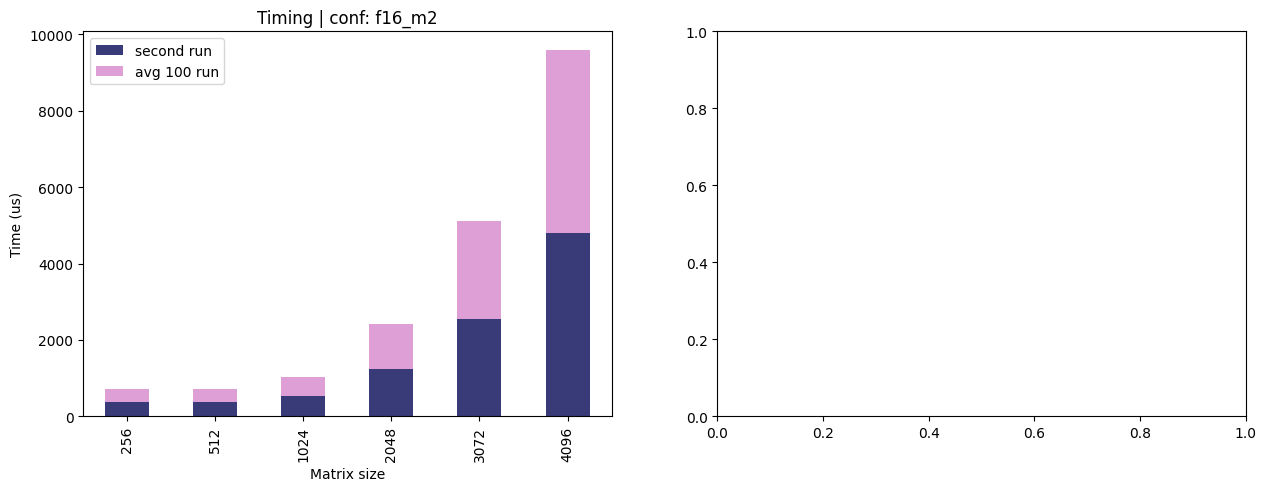

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
i, j = 0, 0
for conf in df_inf_avg.columns:
    df_combined = pd.concat([df_sr[conf], df_inf_avg[conf]], axis=1)
    df_combined.columns = ["second run", "avg 100 run"]
    df_combined

    # Create a stacked bar plot
    plot = df_combined.plot(kind='bar', stacked=True, ax=axs[j], colormap="tab20b")
    if j < 2:
        j+=1
    else:
        j = 0
        i +=1

    plot.set_title(f'Timing | conf: {conf}')
    plot.set_xlabel('Matrix size')
    plot.set_ylabel('Time (us)')
plt.show()

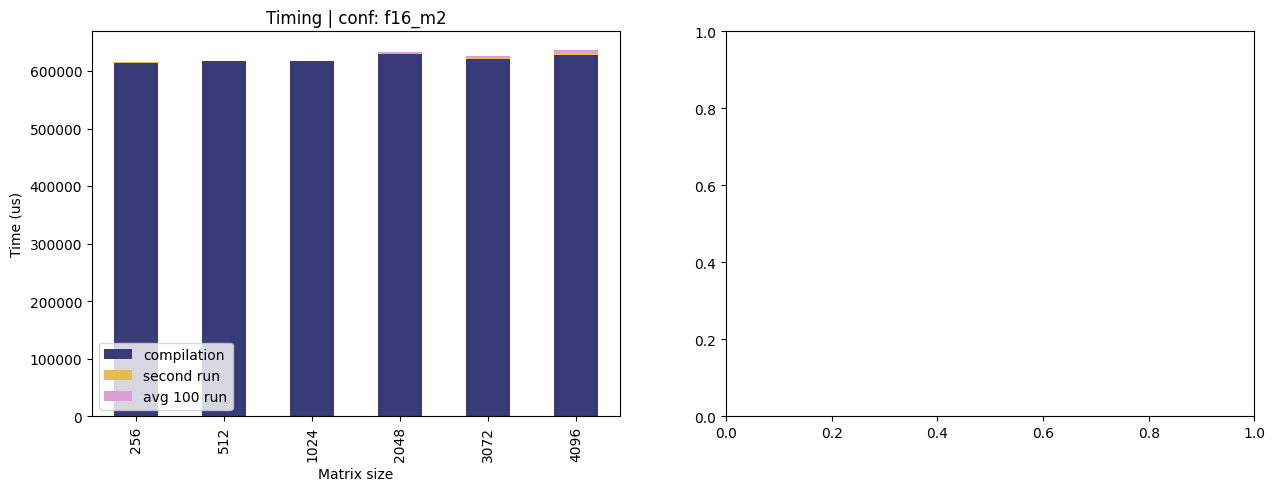

In [11]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
i, j = 0, 0
for conf in df_inf_avg.columns:
    df_combined = pd.concat([df_compile[conf], df_sr[conf], df_inf_avg[conf]], axis=1)
    df_combined.columns = ["compilation", "second run", "avg 100 run"]
    df_combined

    # Create a stacked bar plot
    plot = df_combined.plot(kind='bar', stacked=True, ax=axs[j], colormap="tab20b")
    
    if j < 2:
        j+=1
    else:
        j = 0
        i +=1

    plot.set_title(f'Timing | conf: {conf}')
    plot.set_xlabel('Matrix size')
    plot.set_ylabel('Time (us)')
plt.show()

### Torch comparison 

#### Torch bf16

In [ ]:
df_torch = pd.concat([
    # too slow: pd.read_csv("./results/torch_bfp16.csv", index_col="m"), 
    pd.read_csv("./results/cpu/torch_fp32.csv", index_col="m"),
    pd.read_csv("./results/cpu/torch_bfp16_gmtg.csv", index_col="m"),
    pd.read_csv("./results/cpu/torch_fp32_gmtg.csv", index_col="m")], axis=1)
df_compare_conf_torch = pd.concat([df_inf_avg, df_torch], axis=1)
df_compare_conf_torch

,f16_m2,torch_fp32,torch_bfp16_gmtg,torch_fp32_gmtg
256,328.677476,8.206129e+01,94.101429,121.059418
512,343.824680,4.992867e+02,94.506741,311.038494
1024,498.797122,3.081963e+03,146.510601,875.525475
2048,1176.135352,2.506427e+04,1475.477219,1716.034412
3072,2542.322417,8.344136e+04,2452.740669,7719.821930
4096,4783.753749,2.274305e+05,6673.305035,16620.409489
8192,NaN,1.653865e+06,42056.601048,116032.037735


CPU Torch fp16 is out of scale (working single core)

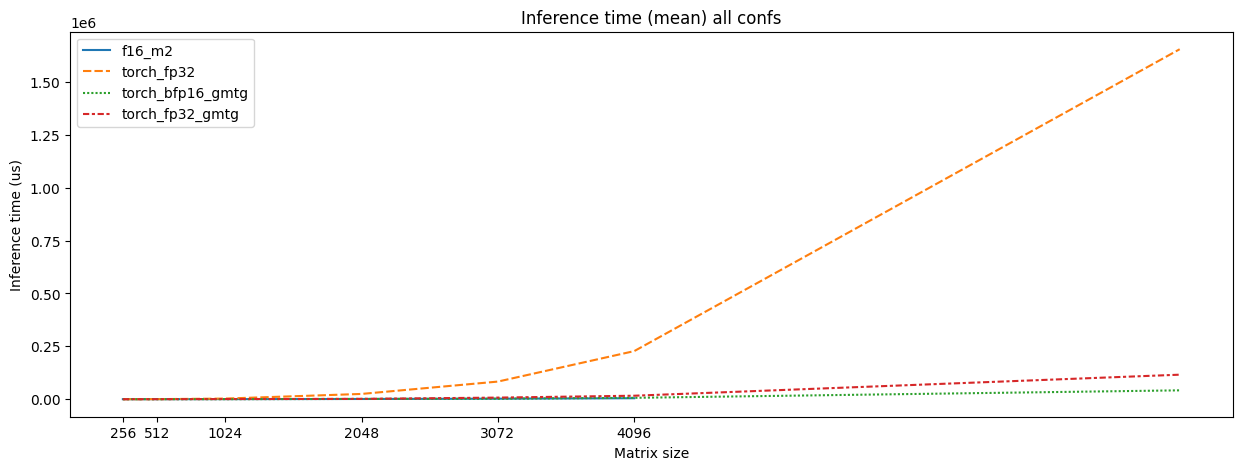

In [13]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_compare_conf_torch, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (us)")
plot.set_title("Inference time (mean) all confs")

plt.show()

Smaller window and ignore fp16

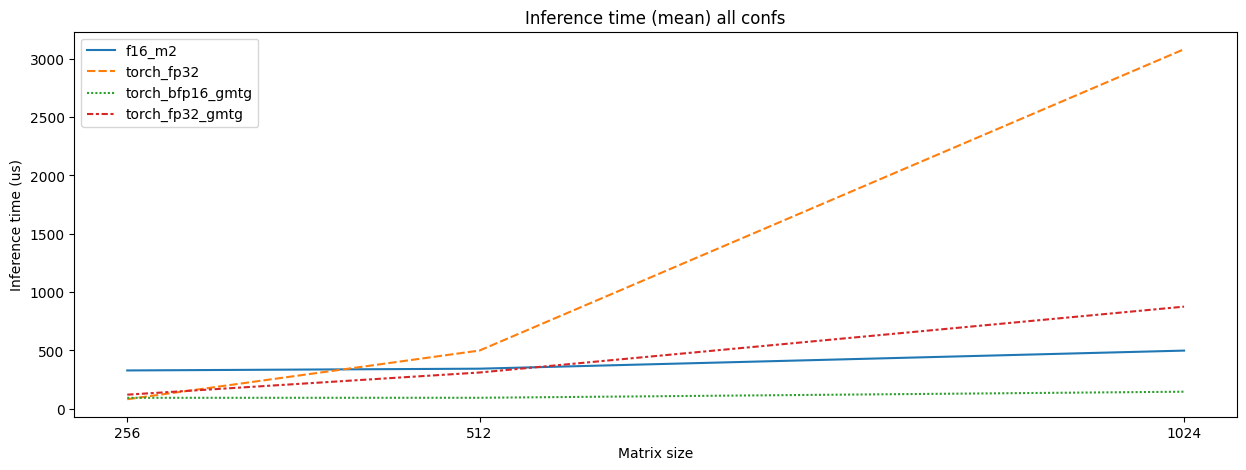

In [14]:
fig, ax = plt.subplots(figsize=(15,5))
window = 3

plot = sns.lineplot(df_compare_conf_torch.iloc[:window], ax=ax)
plot.set_xticks(unq_m[:window])
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (us)")
plot.set_title("Inference time (mean) all confs")

plt.show()

##### Torch comparison including transfer time

In [15]:
df_compare_conf_torch_tot = pd.concat([df_transf0_avg + df_transf1_avg + df_inf_avg, df_torch], axis=1)
df_compare_conf_torch_tot

,f16_m2,torch_fp32,torch_bfp16_gmtg,torch_fp32_gmtg
256,1015.999975,8.206129e+01,94.101429,121.059418
512,1542.655122,4.992867e+02,94.506741,311.038494
1024,2484.703633,3.081963e+03,146.510601,875.525475
2048,8228.411642,2.506427e+04,1475.477219,1716.034412
3072,18217.623321,8.344136e+04,2452.740669,7719.821930
4096,32366.052826,2.274305e+05,6673.305035,16620.409489
8192,NaN,1.653865e+06,42056.601048,116032.037735


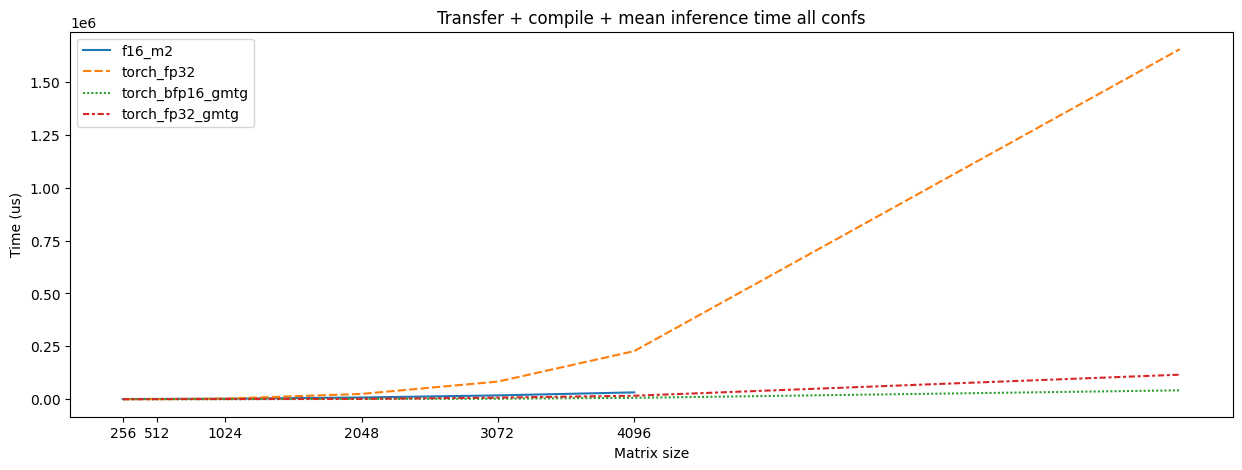

In [16]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_compare_conf_torch_tot, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (us)")
plot.set_title("Transfer + compile + mean inference time all confs")

plt.show()

Smaller window. A single matmul is always faster on CPU (torch_32) due to the overhead

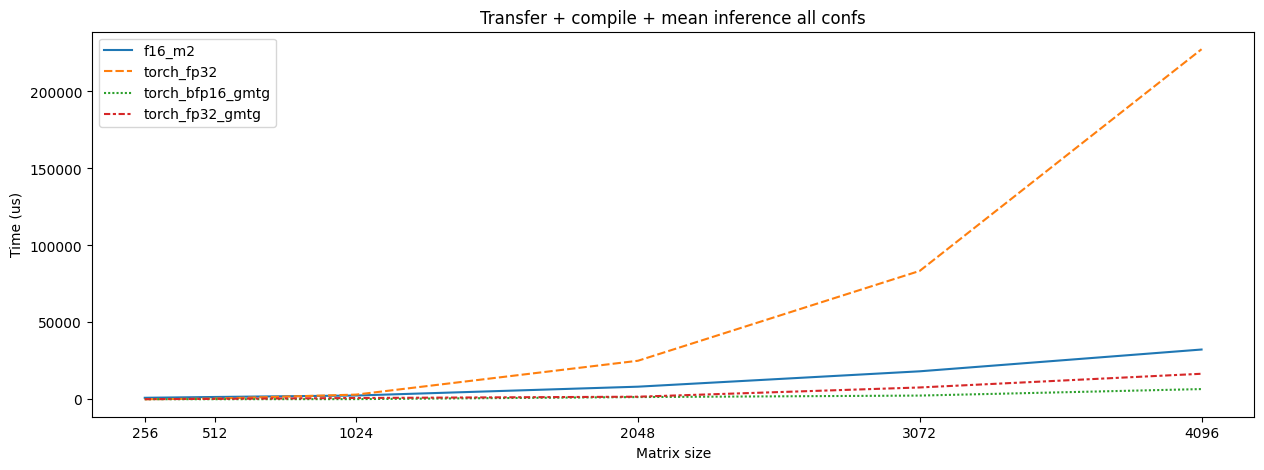

In [17]:
fig, ax = plt.subplots(figsize=(15,5))

window = 6
plot = sns.lineplot(df_compare_conf_torch_tot.iloc[:window], ax=ax)
plot.set_xticks(unq_m[:window])
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (us)")
plot.set_title("Transfer + compile + mean inference all confs")

plt.show()

## First run vs subsequent run comparison

In [18]:
df_first_round = pd.DataFrame()
conf = 'f16_m2'
df_first_round['conversion_in0'] = df_conversion0_fr[conf]
df_first_round['conversion_in1'] = df_conversion1_fr[conf]
df_first_round['transfer_in0'] = df_transf0_fr[conf]
df_first_round['transfer_in1'] = df_transf1_fr[conf]
df_first_round['tilization_in0'] = df_tilization0_fr[conf]
df_first_round['tilization_in1'] = df_tilization1_fr[conf]
df_first_round['run'] = get_column_df_info(df, 'first_run')[conf]
df_first_round


,conversion_in0,conversion_in1,transfer_in0,transfer_in1,tilization_in0,tilization_in1,run
256,864.911079,315.552950,467.863083,220.296383,313937.596083,300.719738,614709.889889
512,7999.850512,325.554609,1261.545420,378.574133,299146.206379,302.069187,617103.030682
1024,5387.188196,325.671434,1948.537827,989.125967,293075.178862,380.997658,617366.255522
2048,665.869713,319.411755,3725.061417,3474.720716,295085.936785,713.591576,631237.223148
3072,680.204630,324.748755,7836.548090,7629.070282,289667.451382,1435.467005,622559.059858
4096,726.066828,338.922739,13527.133465,13388.447762,290860.767365,2126.765251,631871.958971


In [19]:
df_n_round = pd.DataFrame()
conf = 'f16_m2' # the n runned!
df_n_round['conversion_in0'] = df_conversion0_avg[conf]
df_n_round['conversion_in1'] = df_conversion1_avg[conf]
df_n_round['transfer_in0'] = df_transf0_avg[conf]
df_n_round['transfer_in1'] = df_transf1_avg[conf]
df_n_round['tilization_in0'] = df_tilization0_avg[conf]
df_n_round['tilization_in1'] = df_tilization1_avg[conf]
df_n_round['run'] = df_inf_avg[conf]
df_n_round

,conversion_in0,conversion_in1,transfer_in0,transfer_in1,tilization_in0,tilization_in1,run
256,255.281120,221.675821,331.222368,356.100131,415.013526,287.795546,328.677476
512,434.234238,246.689403,714.687341,484.143101,327.426638,325.498517,343.824680
1024,516.316762,240.494166,1018.278918,967.627593,402.899294,352.229950,498.797122
2048,406.473084,220.759249,3576.624308,3475.651982,715.504918,698.075665,1176.135352
3072,572.661895,415.502944,7966.997297,7708.303608,1662.727074,1511.263648,2542.322417
4096,615.406220,410.598127,13903.590998,13678.708079,2306.892868,2205.898490,4783.753749


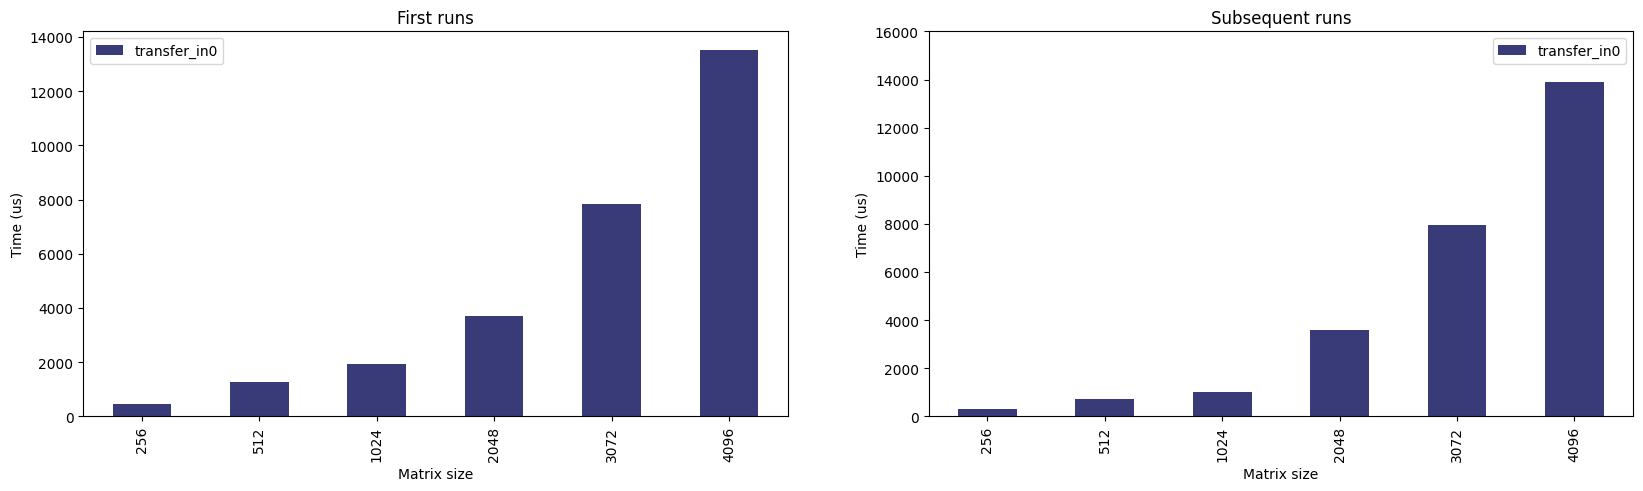

In [20]:
cols = ["transfer_in0"]

fig, axs = plt.subplots(1,2, figsize=(20,5))

plot_fr = df_first_round[cols].plot(kind='bar', stacked=True, use_index=True, ax=axs[0], colormap="tab20b")
plot_fr.set_title(f'First runs')
plot_fr.set_xlabel('Matrix size')
plot_fr.set_ylabel('Time (us)')

plot = df_n_round[cols].plot(kind='bar', stacked=True, use_index=True, ax=axs[1], colormap="tab20b")
plot.set_title(f'Subsequent runs')
plot.set_yticks(plot_fr.get_yticks())
plot.set_xlabel('Matrix size')
plot.set_ylabel('Time (us)')
plt.show()

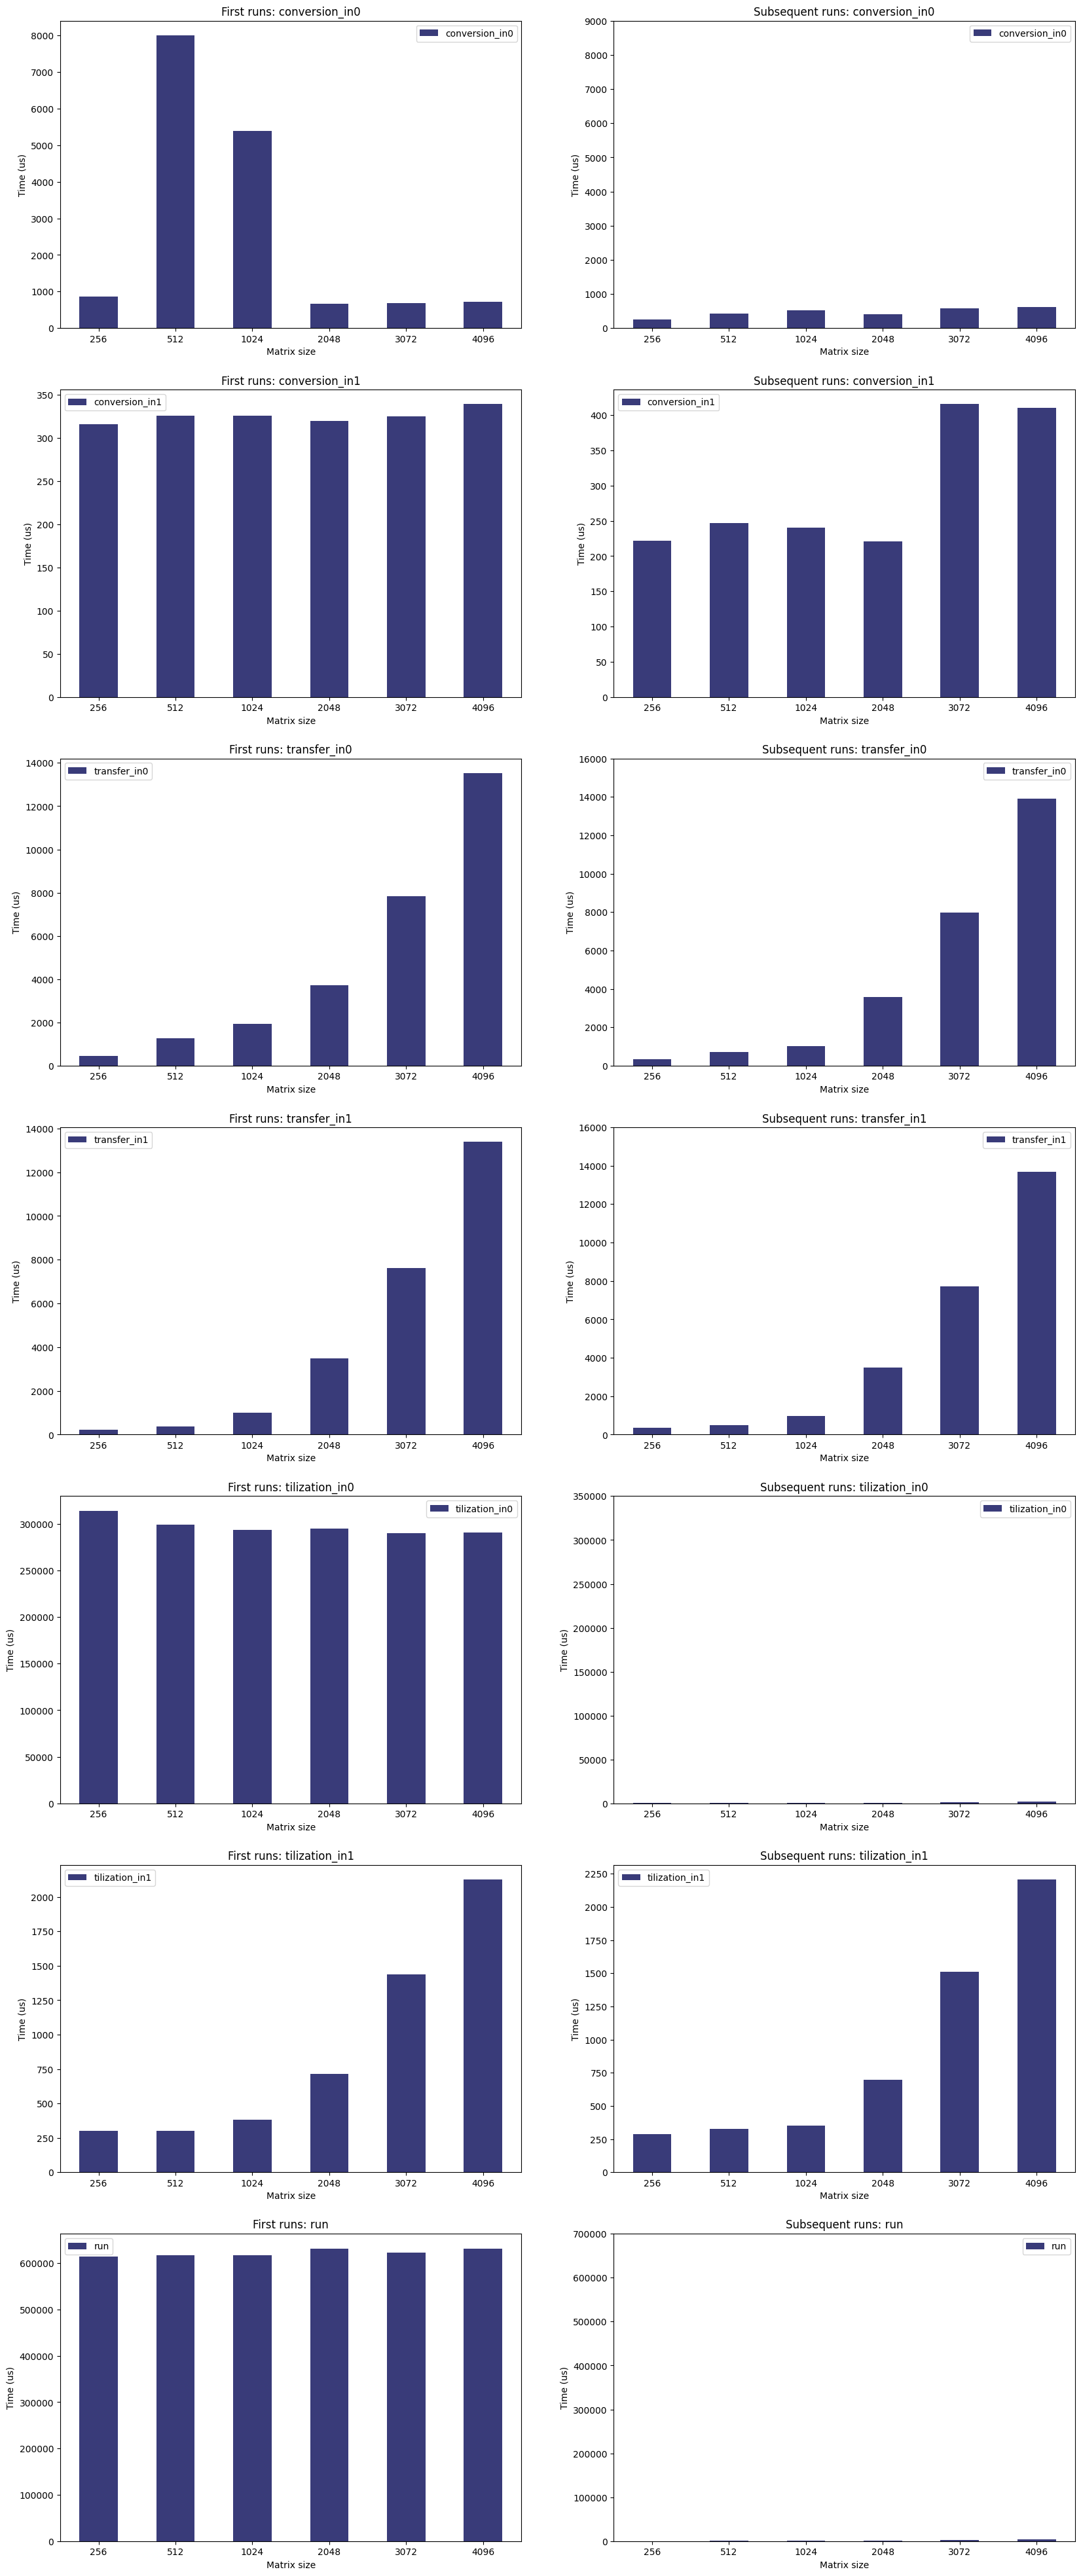

In [21]:
cols = ["transfer_in0"]

fig, axs = plt.subplots(len(df_first_round.columns), 2, figsize=(20,50))

i = 0 
for col in df_first_round.columns:

    plot_fr = df_first_round[[col]].plot(kind='bar', stacked=True, use_index=True, ax=axs[i][0], colormap="tab20b", rot=0)
    plot_fr.set_title(f'First runs: {col}')
    plot_fr.set_xlabel('Matrix size')
    plot_fr.set_ylabel('Time (us)')

    plot = df_n_round[[col]].plot(kind='bar', stacked=True, use_index=True, ax=axs[i][1], colormap="tab20b", rot=0)
    plot.set_title(f'Subsequent runs: {col}')
    plot.set_yticks(plot_fr.get_yticks())
    plot.set_xlabel('Matrix size')
    plot.set_ylabel('Time (us)')

    i+=1

    
plt.show()

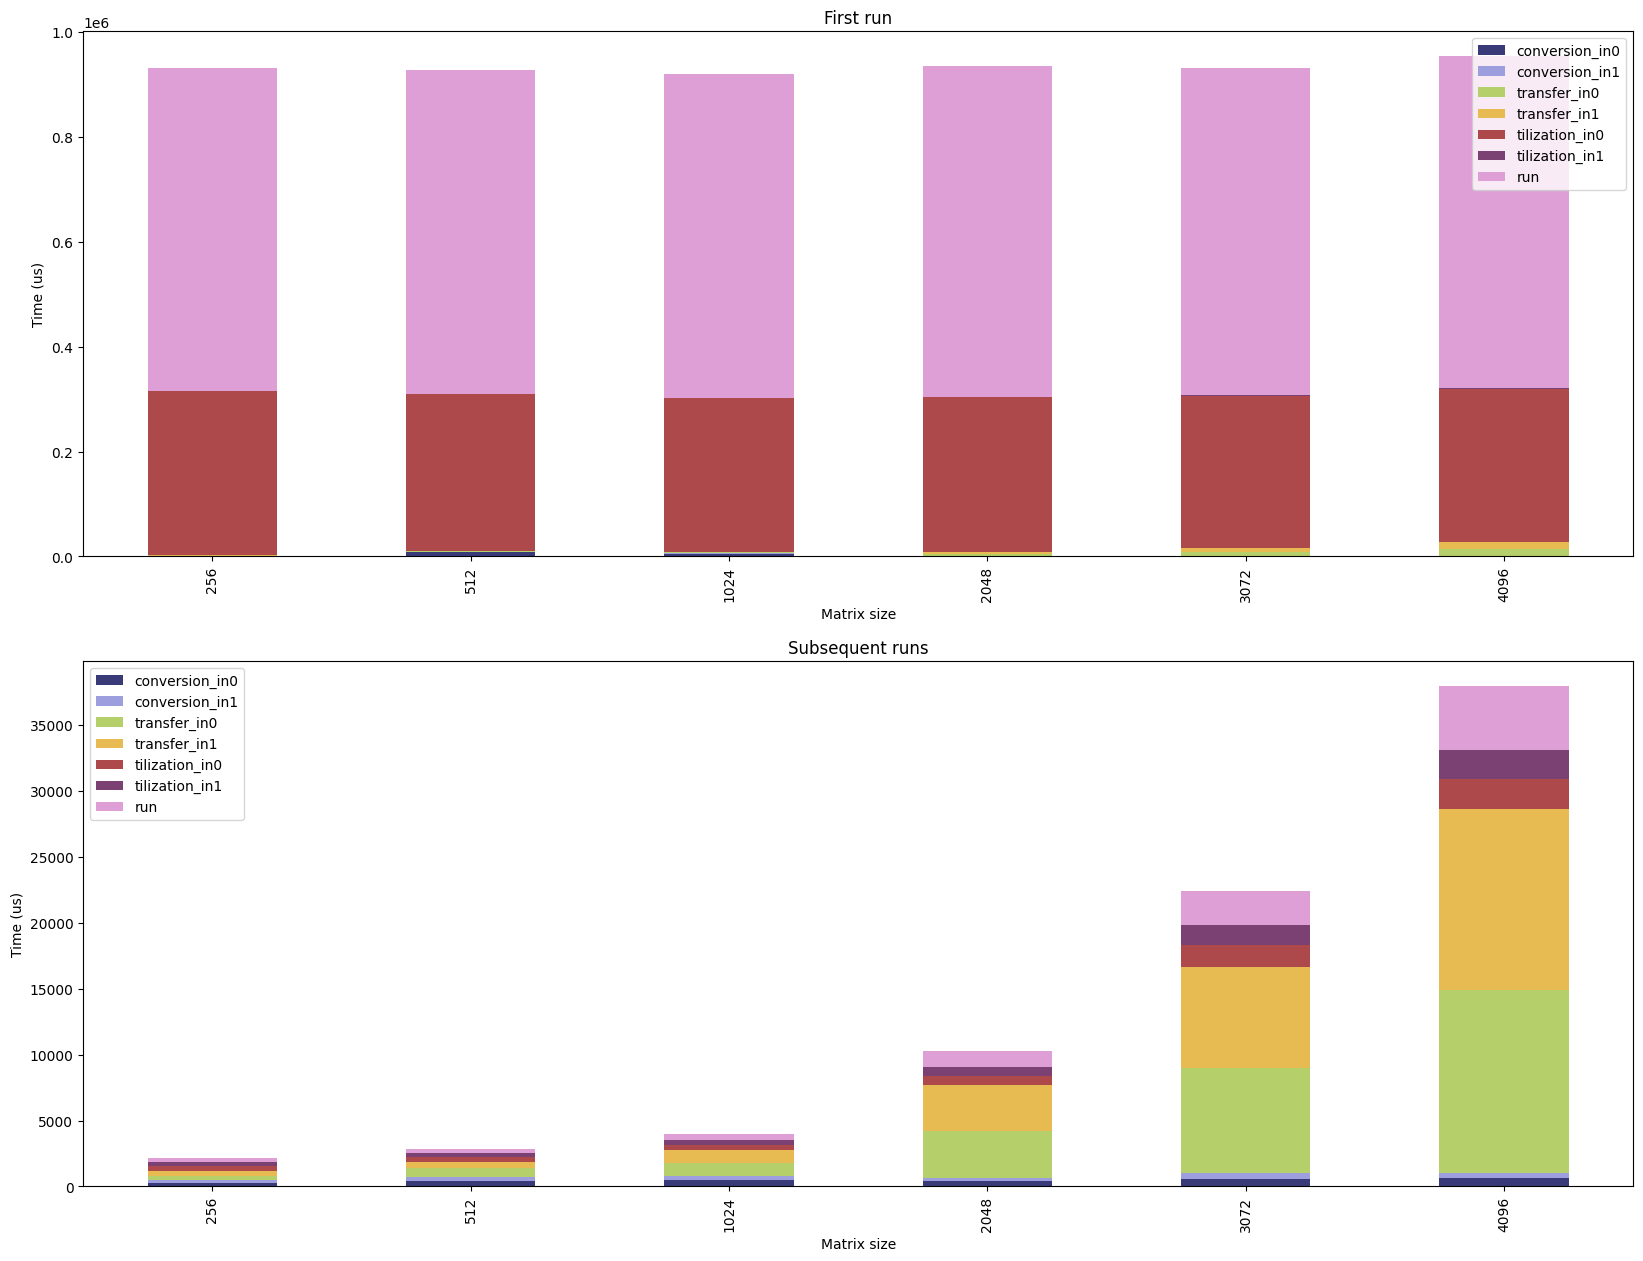

In [22]:
fig, axs = plt.subplots(2,1, figsize=(20,15))

plot = df_first_round.plot(kind='bar', stacked=True, use_index=True, ax=axs[0], colormap="tab20b")
plot.set_title(f'First run')
plot.set_xlabel('Matrix size')
plot.set_ylabel('Time (us)')

plot = df_n_round.plot(kind='bar', stacked=True, use_index=True, ax=axs[1], colormap="tab20b")
plot.set_title(f'Subsequent runs')
plot.set_xlabel('Matrix size')
plot.set_ylabel('Time (us)')
plt.show()

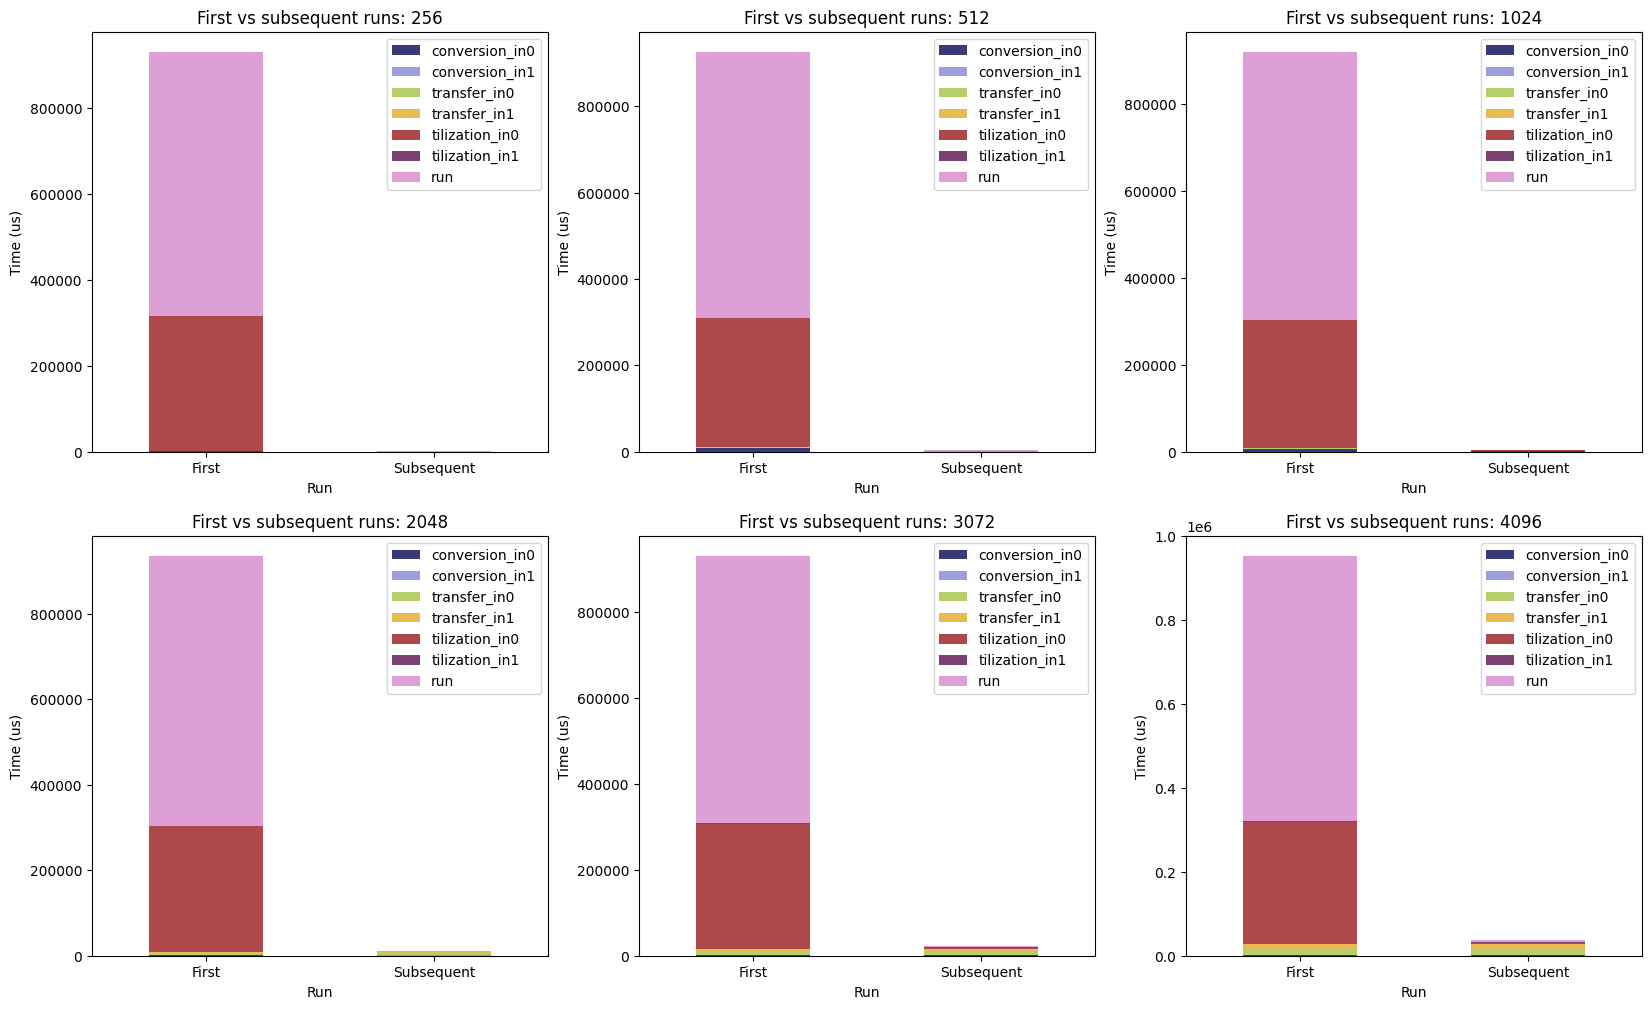

In [23]:
fig, axs = plt.subplots(2,3, figsize=(20,12))
i, j = 0, 0
for m in unq_m:
    # Create a stacked bar plot
    df_combined = pd.concat([df_first_round.loc[[m]], df_n_round.loc[[m]]])
    plot = df_combined.plot(kind='bar', stacked=True, use_index=True, ax=axs[i][j], colormap="tab20b")
    plot.set_xticklabels(["First", "Subsequent"], rotation=0)
    
    if j < 2:
        j+=1
    else:
        j = 0
        i +=1

    plot.set_title(f'First vs subsequent runs: {m}')
    plot.set_xlabel('Run')
    plot.set_ylabel('Time (us)')
plt.show()

In [27]:
19038647 * 1 / 1e6

19.038647

In [24]:
df_torch_bfp16_gmtk = pd.DataFrame()
df_torch_fp32_gmtk = pd.DataFrame()
df_torch_fp32 = pd.DataFrame()
df_torch_bfp16_gmtk['run'] = pd.DataFrame(df_torch[['torch_bfp16_gmtg']])
df_torch_fp32_gmtk['run'] = df_torch[['torch_fp32_gmtg']]
df_torch_fp32['run'] = df_torch[['torch_fp32']]
df_torch

,torch_fp32,torch_bfp16_gmtg,torch_fp32_gmtg
m,,,
256,8.206129e+01,94.101429,121.059418
512,4.992867e+02,94.506741,311.038494
1024,3.081963e+03,146.510601,875.525475
2048,2.506427e+04,1475.477219,1716.034412
3072,8.344136e+04,2452.740669,7719.821930
4096,2.274305e+05,6673.305035,16620.409489
8192,1.653865e+06,42056.601048,116032.037735


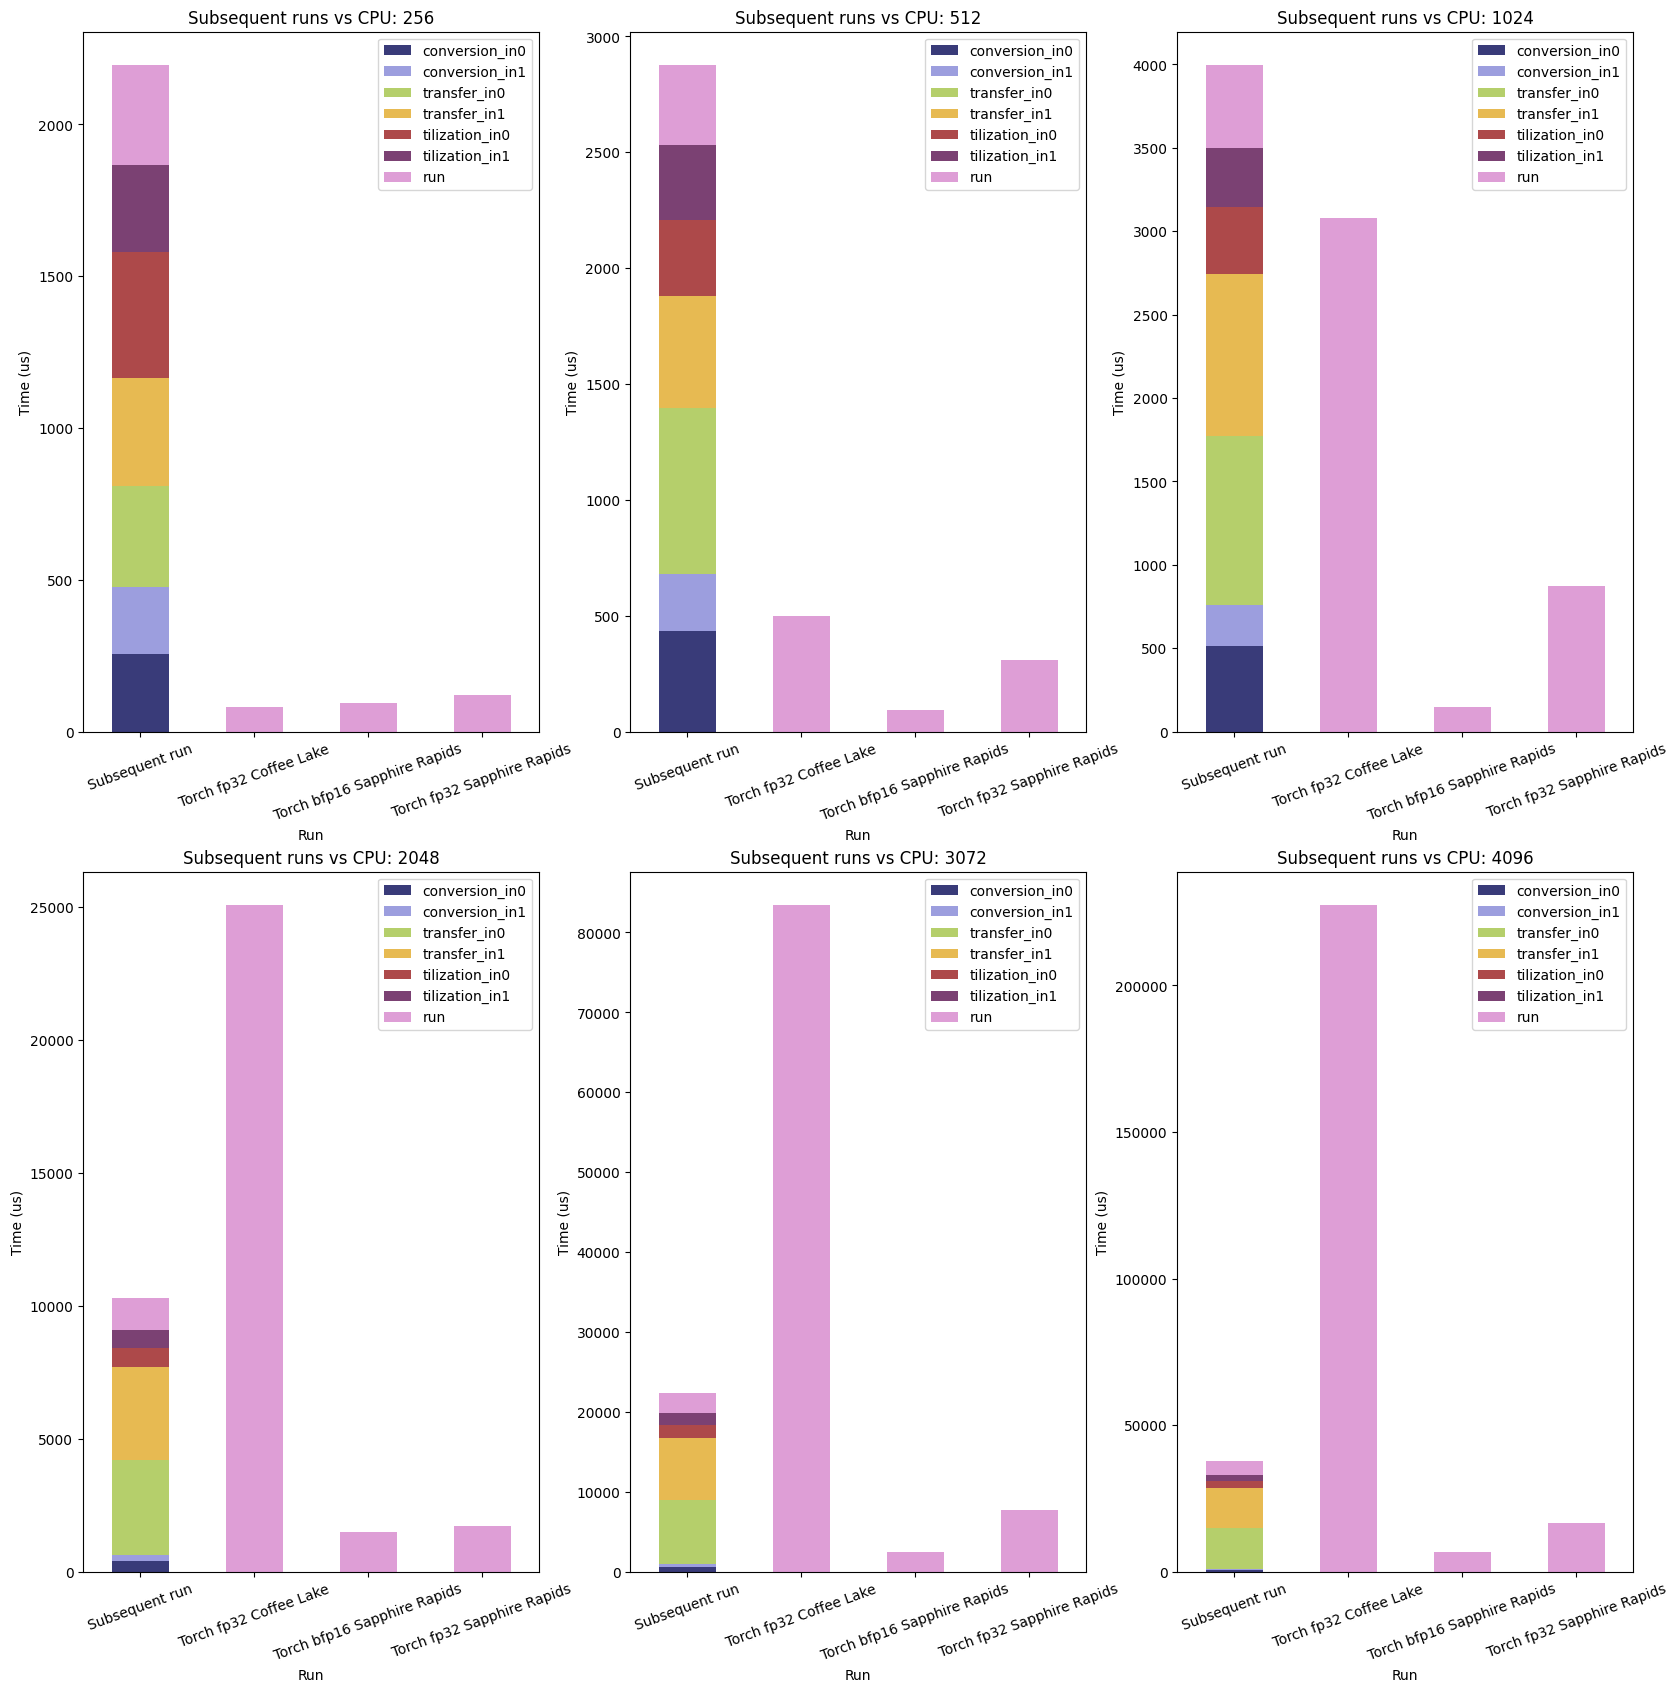

In [25]:
fig, axs = plt.subplots(2,3, figsize=(20,20))
i, j = 0, 0
for m in unq_m:
    # Create a stacked bar plot
    df_combined = pd.concat([df_n_round.loc[[m]], df_torch_fp32.loc[[m]], df_torch_bfp16_gmtk.loc[[m]], df_torch_fp32_gmtk.loc[[m]]])
    plot = df_combined.plot(kind='bar', stacked=True, use_index=True, ax=axs[i][j], colormap="tab20b")
    plot.set_xticklabels(["Subsequent run", "Torch fp32 Coffee Lake", "Torch bfp16 Sapphire Rapids", "Torch fp32 Sapphire Rapids"], rotation=20)
    
    if j < 2:
        j+=1
    else:
        j = 0
        i +=1

    plot.set_title(f'Subsequent runs vs CPU: {m}')
    plot.set_xlabel('Run')
    plot.set_ylabel('Time (us)')
plt.show()

### Speedup run only

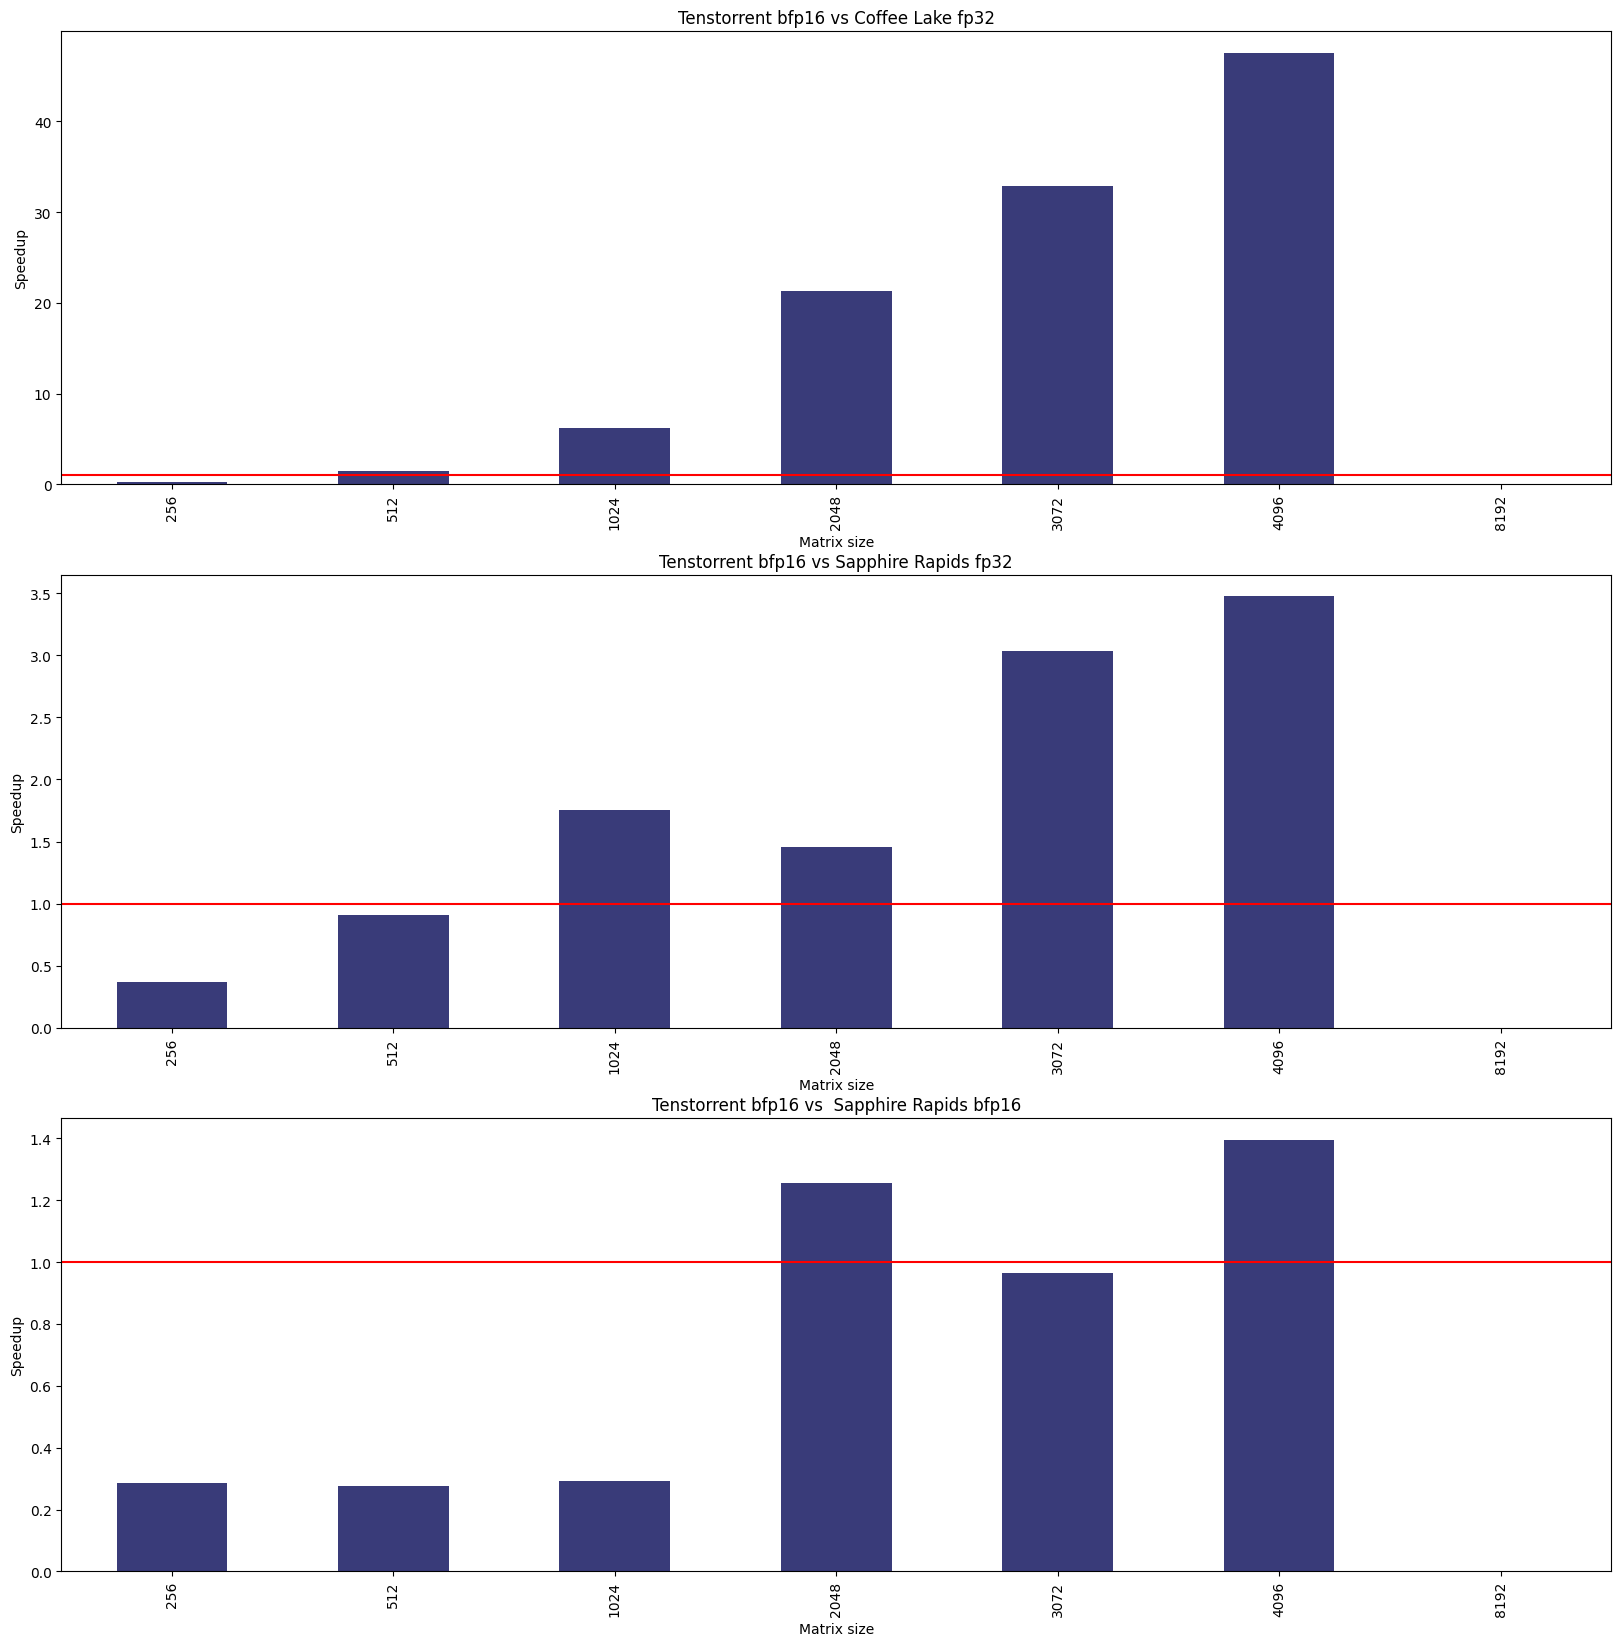

In [26]:
fig, axs = plt.subplots(3,1, figsize=(20,20))

plot = (df_torch_fp32['run'] / df_n_round['run']).plot(kind='bar', stacked=True, use_index=True, ax=axs[0], colormap="tab20b")
plot.axhline(y=1, color='r', linestyle='-')
plot.set_title(f'Tenstorrent bfp16 vs Coffee Lake fp32')
plot.set_xlabel('Matrix size')
plot.set_ylabel('Speedup')

plot = (df_torch_fp32_gmtk['run'] / df_n_round['run']).plot(kind='bar', stacked=True, use_index=True, ax=axs[1], colormap="tab20b")
plot.axhline(y=1, color='r', linestyle='-')
plot.set_title(f'Tenstorrent bfp16 vs Sapphire Rapids fp32')
plot.set_xlabel('Matrix size')
plot.set_ylabel('Speedup')

plot = (df_torch_bfp16_gmtk['run'] / df_n_round['run']).plot(kind='bar', stacked=True, use_index=True, ax=axs[2], colormap="tab20b")
plot.axhline(y=1, color='r', linestyle='-')
plot.set_title(f'Tenstorrent bfp16 vs  Sapphire Rapids bfp16')
plot.set_xlabel('Matrix size')
plot.set_ylabel('Speedup')

plt.show()

### 

## Performance


In [27]:
# Ideal GFLOPS

# GFLOPS Sapphire Rapids
# frq * n_core * n_AVX-512 * (AVX-512_len / bit) * n_op
GFLOPS_32_SR = 2.0 * 112 * 2 * (512 / 32) * 2
GFLOPS_16_SR = 2.0 * 112 * 2 * (512 / 16) * 2

# GFLOPS Coffee Lake
# frq * n_core * n_AVX-2 (???) * (AVX-2_len / bit) * n_op
GFLOPS_32_CL = 3.0 * 8 * 2 * (256 / 32) * 2

# GFLOPS GS
GFLOPS_16_GS = 55000
GFLOPS_8_GS = 221000

In [28]:
# Actual gflops
import numpy as np

mat_dims = df_torch_fp32_gmtk.index.values
# n_flop = mat_dims * mat_dims * (2 * mat_dims - 1)
n_flop = 2 * np.power(mat_dims, 3)

gflops_32_SR = pd.DataFrame(n_flop / 1e9 / (df_torch_fp32_gmtk['run'] / 1e6))
gflops_32_SR.columns = ["gflops"]

gflops_16_SR = pd.DataFrame(n_flop / 1e9 / (df_torch_bfp16_gmtk['run'] / 1e6))
gflops_16_SR.columns = ["gflops"]

gflops_32_CL = pd.DataFrame(n_flop / 1e9 / (df_torch_fp32['run'] / 1e6))
gflops_32_CL.columns = ["gflops"]

gflops_16_gs = pd.DataFrame(n_flop [:-1]/ 1e9 / (df_n_round['run'] / 1e6))
gflops_16_gs.columns = ["gflops"]

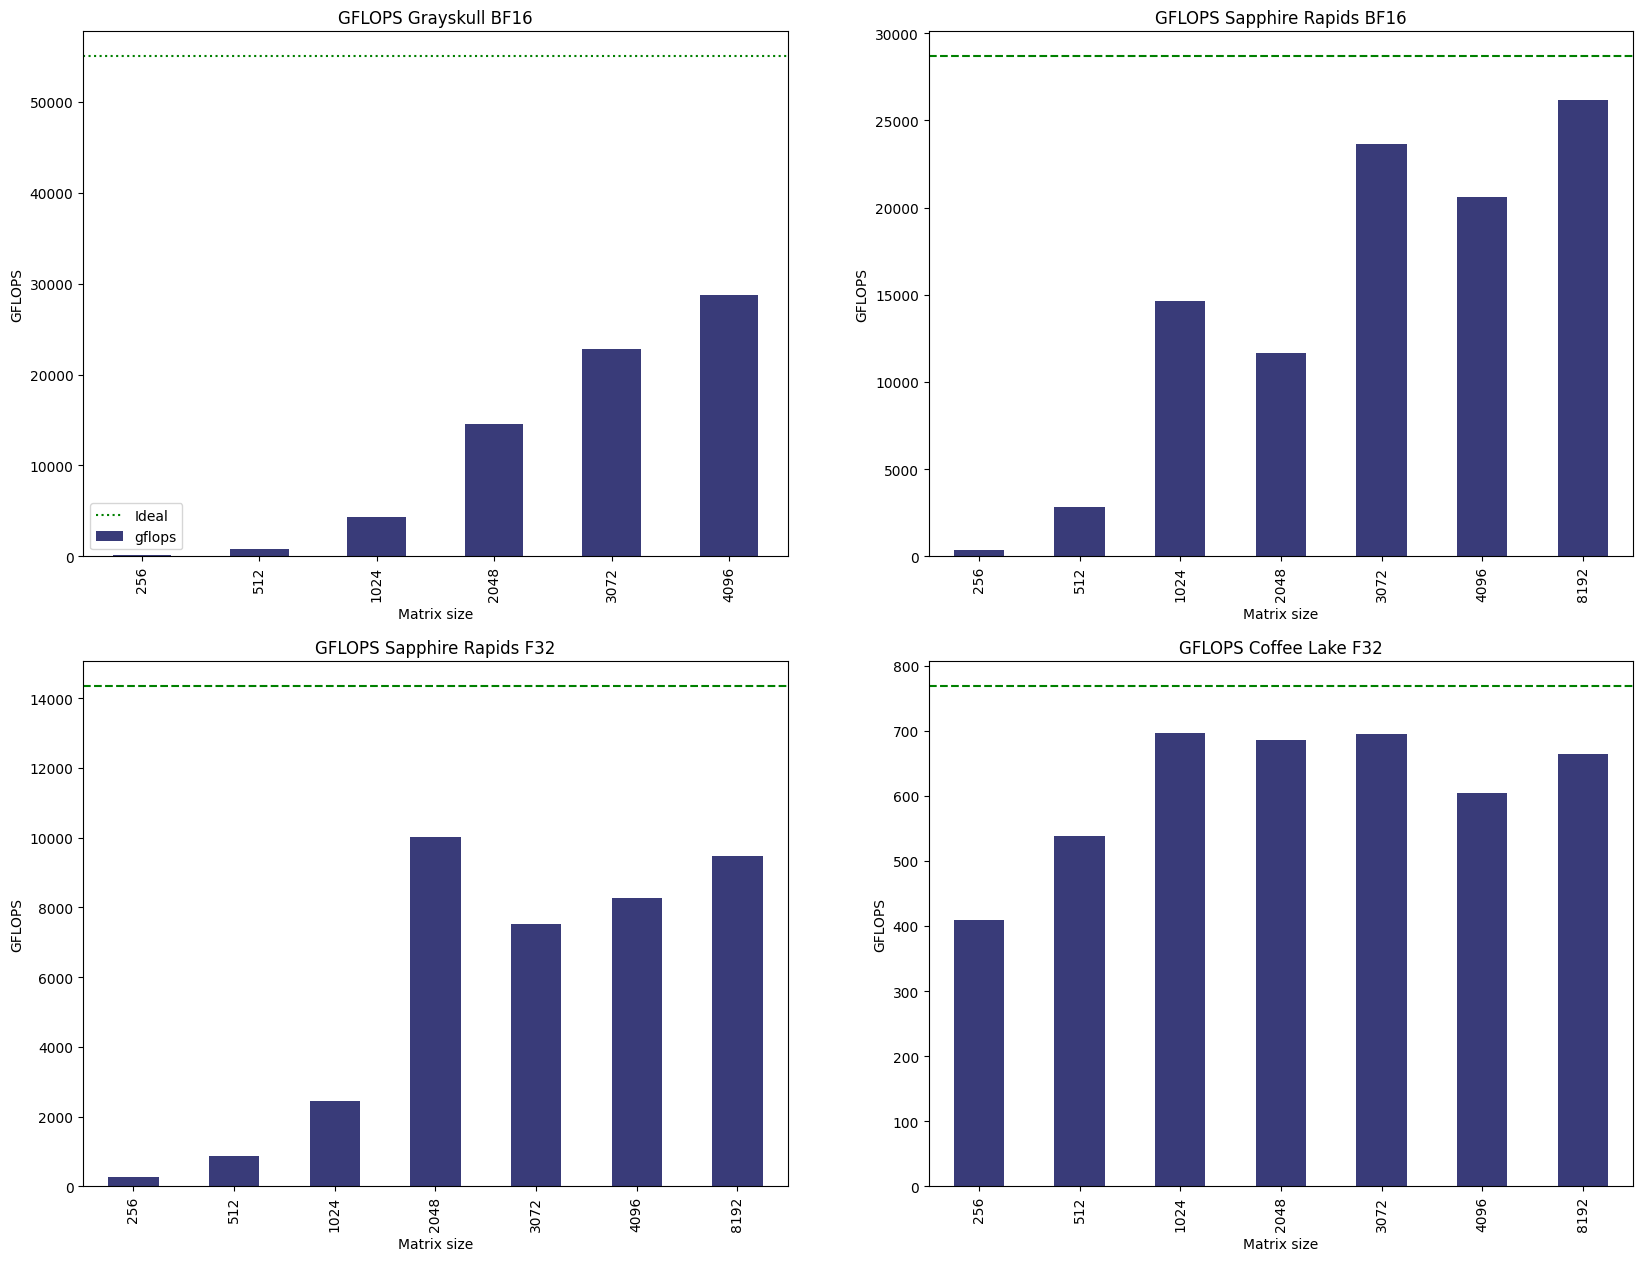

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(20,15))

plot = (gflops_16_gs['gflops']).plot(kind='bar', stacked=True, use_index=True, ax=axs[0][0], colormap="tab20b")
plot.axhline(y=GFLOPS_16_GS, color='g', linestyle=':', label="Ideal")
plot.legend()
plot.set_title(f'GFLOPS Grayskull BF16')
plot.set_xlabel('Matrix size')
plot.set_ylabel('GFLOPS')

plot = (gflops_16_SR['gflops']).plot(kind='bar', stacked=True, use_index=True, ax=axs[0][1], colormap="tab20b")
plot.axhline(y=GFLOPS_16_SR, color='g', linestyle='--')
plot.set_title(f'GFLOPS Sapphire Rapids BF16')
plot.set_xlabel('Matrix size')
plot.set_ylabel('GFLOPS')

plot = (gflops_32_SR['gflops']).plot(kind='bar', stacked=True, use_index=True, ax=axs[1][0], colormap="tab20b")
plot.axhline(y=GFLOPS_32_SR, color='g', linestyle='--')
plot.set_title(f'GFLOPS Sapphire Rapids F32')
plot.set_xlabel('Matrix size')
plot.set_ylabel('GFLOPS')

plot = (gflops_32_CL['gflops']).plot(kind='bar', stacked=True, use_index=True, ax=axs[1][1], colormap="tab20b")
plot.axhline(y=GFLOPS_32_CL, color='g', linestyle='--')
plot.set_title(f'GFLOPS Coffee Lake F32')
plot.set_xlabel('Matrix size')
plot.set_ylabel('GFLOPS')

plt.show()

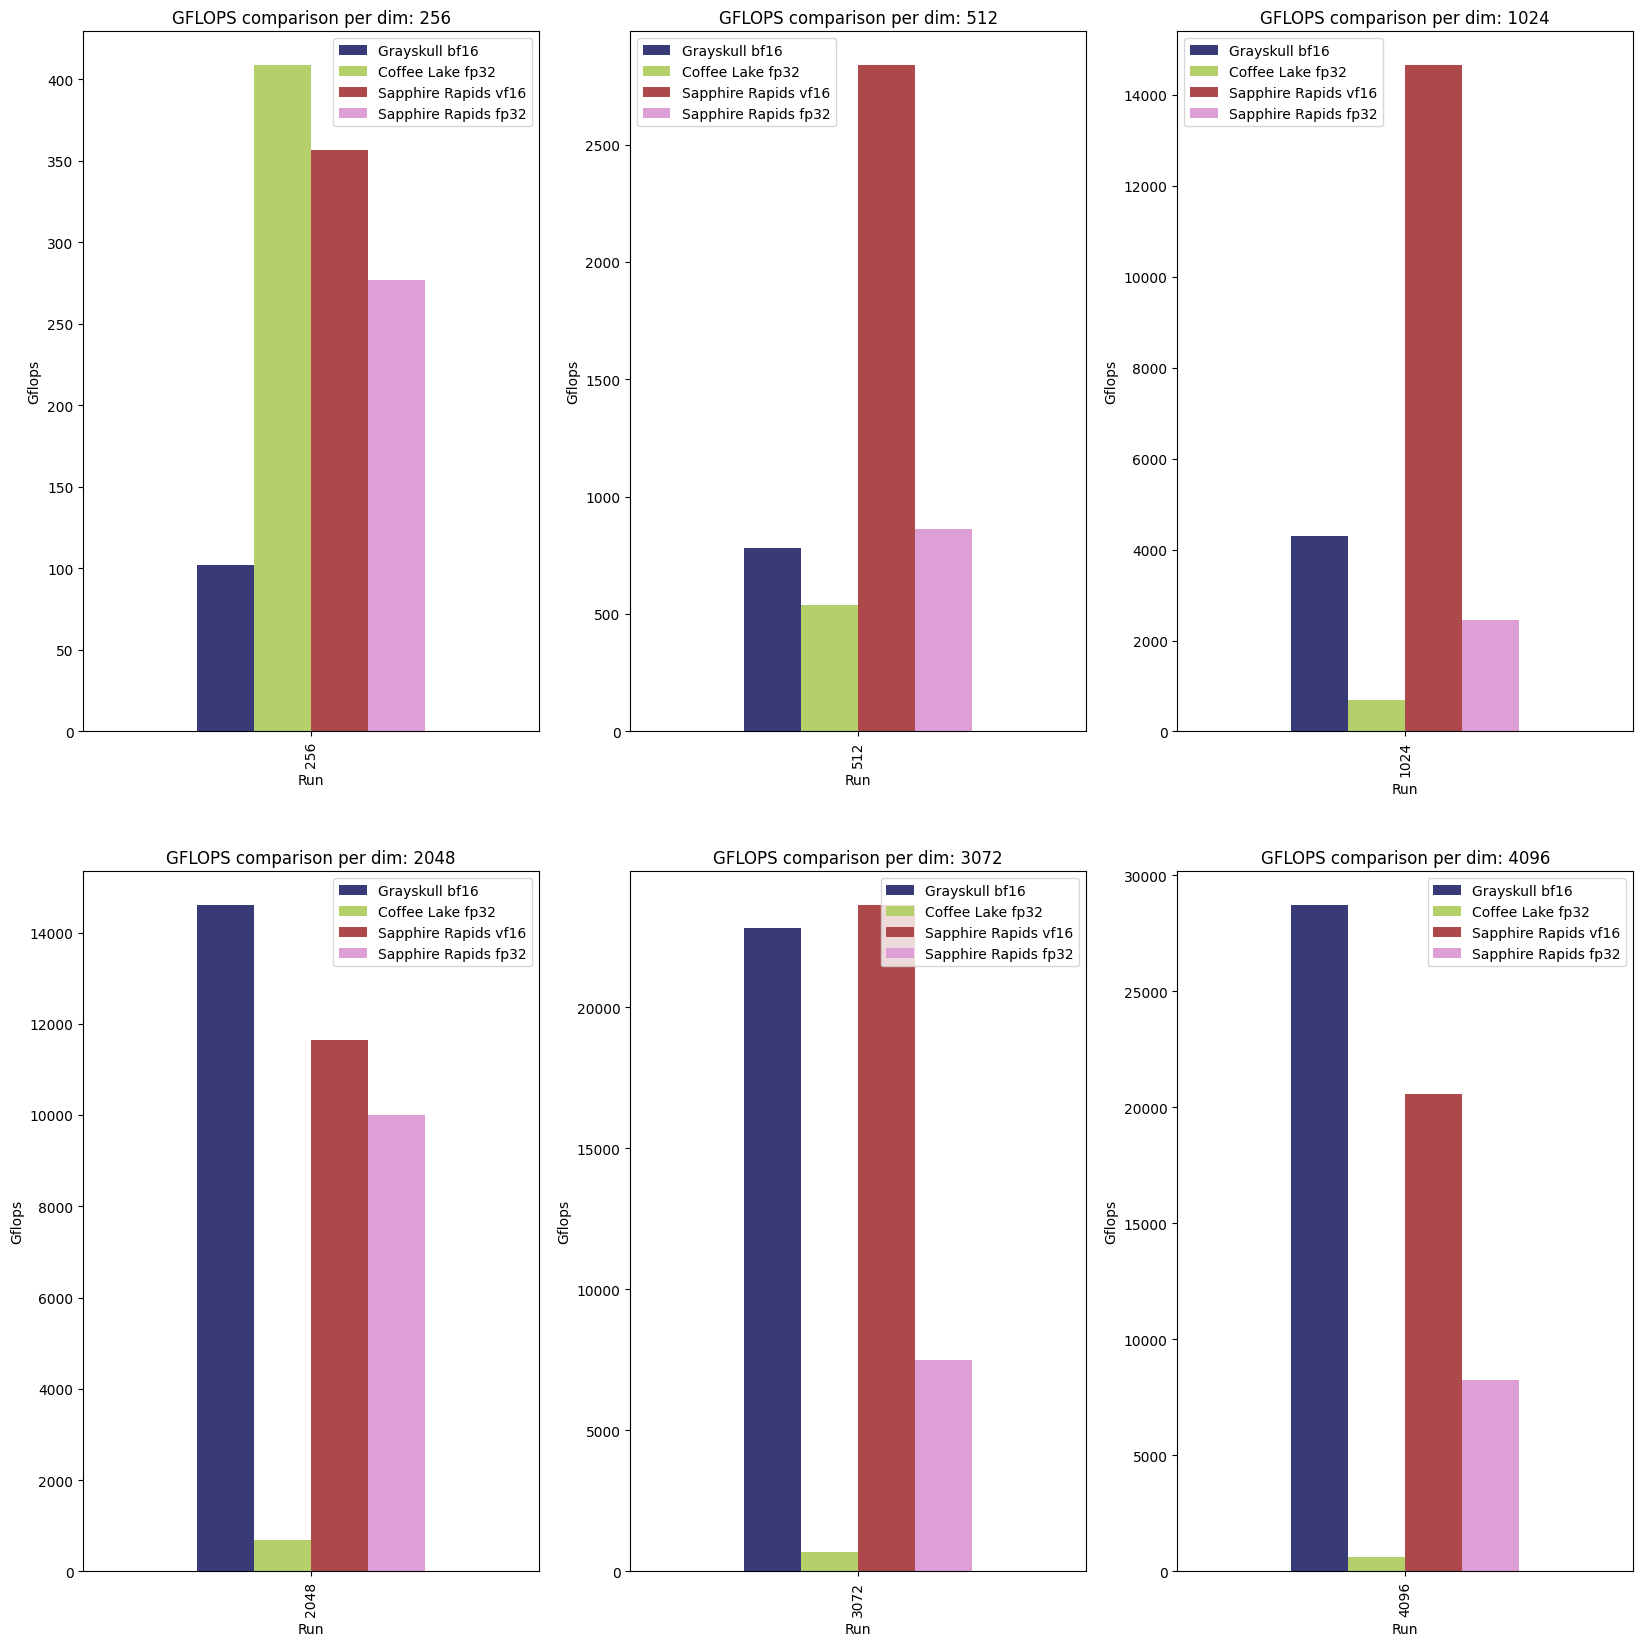

In [116]:
fig, axs = plt.subplots(2,3, figsize=(20,20))
i, j = 0, 0
for m in unq_m:
    # Create a stacked bar plot
    df_combined = pd.concat([gflops_16_gs.loc[[m]], gflops_32_CL.loc[[m]], gflops_16_SR.loc[[m]], gflops_32_SR.loc[[m]]])
    df_combined = df_combined.T
    df_combined.columns = ["Grayskull bf16", "Coffee Lake fp32", "Sapphire Rapids vf16", "Sapphire Rapids fp32"]
    df_combined.index = [m]
    plot = df_combined.plot(kind='bar', ax=axs[i][j], colormap="tab20b")
    # plot.set_xticklabels(["Grayskull bf16", "Coffee Lake fp32", "Sapphire Rapids vf16", "Sapphire Rapids fp32"], rotation=20)
    
    if j < 2:
        j+=1
    else:
        j = 0
        i +=1

    plot.set_title(f'GFLOPS comparison per dim: {m}')
    plot.set_xlabel('Run')
    plot.set_ylabel('Gflops')
plt.show()

In [82]:
df_opt = pd.read_csv("./results/opt/mm_complete_1.0.csv")
df_opt = get_column_df_info(df_opt, "inference_time_avg") # .drop("f4b_m0", axis=1)
for conf in df_opt.columns:
    df_opt[conf] = n_flop/ 1e9 / (df_opt[conf] / 1e6)
df_opt

,f16_m2,f16_m4,f8b_m2,f8b_m0,f4b_m0
256,130.394560,137.721359,136.035158,135.644710,135.941466
512,1099.289308,1095.878571,1065.220063,1065.939149,1089.164392
1024,8810.912272,8631.365145,8576.897707,8571.420324,8285.044938
2048,42971.158539,25488.285661,47830.806793,68609.701214,69486.608898
3072,29125.882082,20153.582537,38374.063347,58623.398475,70631.443759
4096,31353.559120,21595.399547,40599.471078,61541.023992,77514.679890
8192,37353.314720,23933.628859,44382.660783,72751.886452,85024.589035


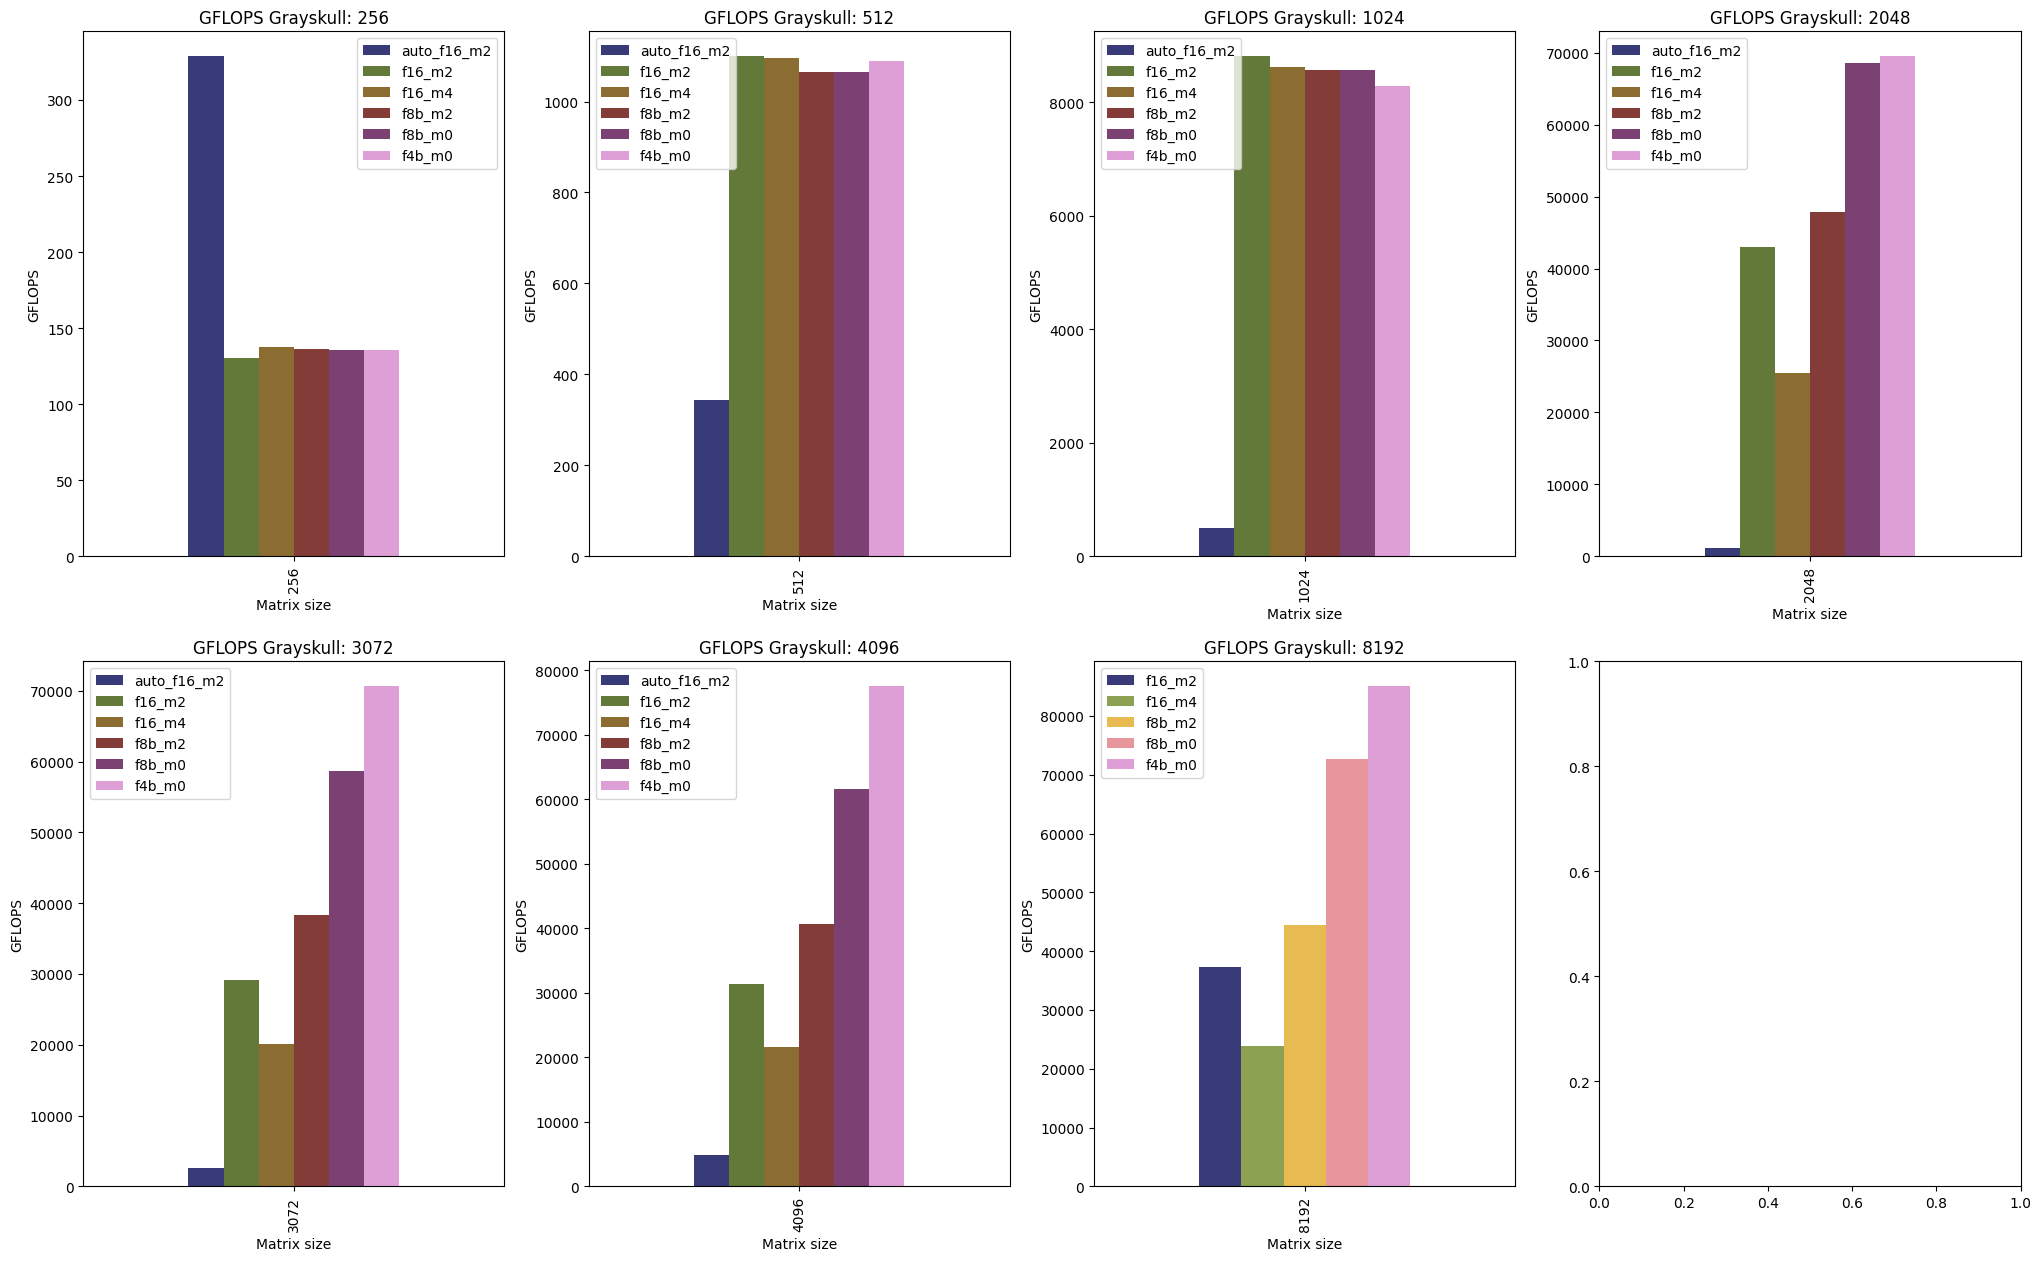

In [ ]:
n_rows = 2
n_cols = 4
fig, axs = plt.subplots(n_rows, n_cols, figsize=(25,15))

i,j = 0, 0

# for conf in df_opt.columns:
    # df_opt_gflops = pd.DataFrame(n_flop/ 1e9 / (df_opt[conf] / 1e6))
    # plot = df_opt_gflops.plot(kind='bar', stacked=True, use_index=True, ax=axs[i][j], colormap="tab20b")
    # if '16' in conf:
    #     plot.axhline(y=GFLOPS_16_GS, color='g', linestyle=':', label="Ideal")
    # else: 
    #     plot.axhline(y=GFLOPS_8_GS, color='g', linestyle=':', label="Ideal")
    
for m in df_opt.index:
    df_combined = df_opt.loc[[m]]
    if m in df_n_round.index:
        oob = df_n_round[['run']].loc[[m]]
        oob.columns = ["auto_f16_m2"]
        df_combined = pd.concat([oob, df_combined] , axis=1)
    plot = df_combined.plot(kind='bar', ax=axs[i][j], colormap="tab20b")
    # df_combined.columns = ["Grayskull bf16", "Coffee Lake fp32", "Sapphire Rapids vf16", "Sapphire Rapids fp32"]
    # df_combined.index = [m]
    # plot.legend()
    plot.set_title(f'GFLOPS Grayskull: {m}')
    plot.set_xlabel('Matrix size')
    plot.set_ylabel('GFLOPS')

    if j < n_cols-1:
        j += 1
    else:
        i += 1
        j = 0


plt.show()

    

## Acceleration vs CPU

$$
CPU_t = \mathcal{N} \text{matmul}_{CPU}\\
DM_t = \text{conversion}_t + \text{transfer}_t + \text{tilization}_t\\
\text{compilation}_t = \text{tilization}_{ct} + \text{matmul}_{ct}\\
TT_t = \text{compilation}_t + \mathcal{N}(\text{matmul}_{TT} + \text{DM}_{t}) \\
$$

To obtain $TT_t < CPU_t$, we need to size N: 

$
    \text{transfer}_t + \text{compilation}_t < \mathcal{N}(\text{matmul}_{CPU} - \text{matmul}_{TT})\\
$

$$
    \mathcal{N} > \frac{\text{transfer}_t + \text{compilation}_t}{\text{matmul}_{CPU} - \text{matmul}_{TT}}
$$

In [26]:
df_overhead = (df_transf0 + df_transf1 + df_compile)
df_overhead

NameError: name 'df_transf0' is not defined

In [164]:
df_accl = ((- df_avg).add(df_torch['torch_fp32'], axis=0))
df_accl

,f16_m2,f16_m4
256,-133.919716,-126.490593
512,295.023918,273.377895
1024,2859.270573,2854.425907
2048,24164.452553,24111.003876
3072,81209.278107,81086.390018
4096,222849.586010,222617.549896
8192,NaN,NaN


In [165]:
df_N_accl = df_overhead / df_accl
df_N_accl

,f16_m2,f16_m4
256,-5409.818604,-1.917424
512,2028.951577,1.357430
1024,233.335164,0.264664
2048,30.116554,0.062175
3072,7.562974,0.031604
4096,3.127775,0.016131
8192,NaN,NaN


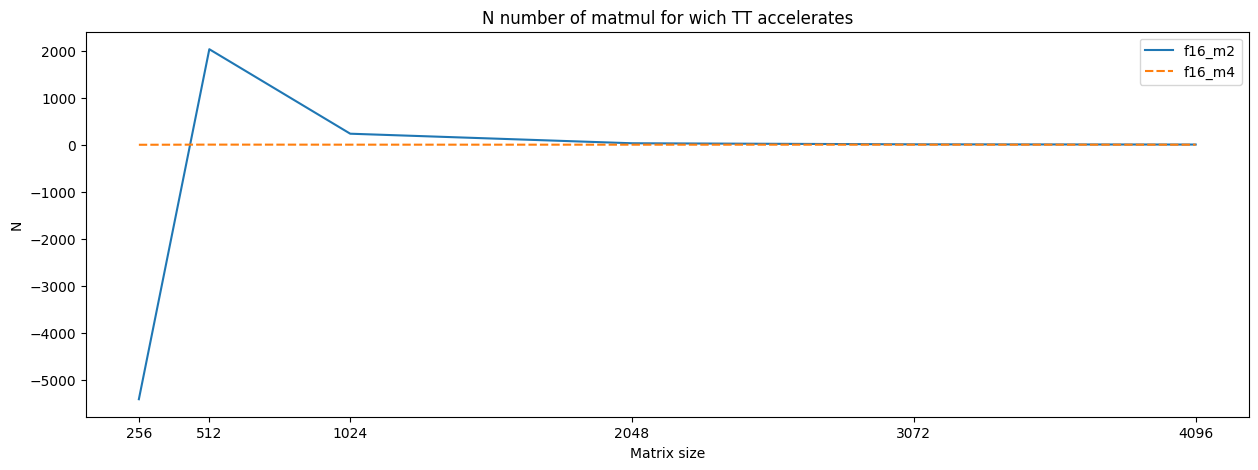

In [166]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_N_accl, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("N")
plot.set_title("N number of matmul for wich TT accelerates")

plt.show()